In [1]:
#pip install pyarrow

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import datetime as dt
import squarify
import os

In [2]:
df_nov = pd.read_csv('2019-Nov.csv')

In [3]:
df_oct = pd.read_csv('2019-Oct.csv')

In [4]:
df_oct=df_oct.loc[df_oct.event_type == 'purchase']
df_nov=df_nov.loc[df_nov.event_type == 'purchase']

In [5]:
frames = [df_oct, df_nov]
df=pd.concat(frames)

In [6]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
162,2019-10-01 00:02:14 UTC,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564
308,2019-10-01 00:04:37 UTC,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
379,2019-10-01 00:06:02 UTC,purchase,5100816,2053013553375346967,NaN,xiaomi,29.51,514591159,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56
442,2019-10-01 00:07:07 UTC,purchase,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f
574,2019-10-01 00:09:26 UTC,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1659788 entries, 162 to 67501944
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   event_time     1659788 non-null  object 
 1   event_type     1659788 non-null  object 
 2   product_id     1659788 non-null  int64  
 3   category_id    1659788 non-null  int64  
 4   category_code  1252145 non-null  object 
 5   brand          1528121 non-null  object 
 6   price          1659788 non-null  float64
 7   user_id        1659788 non-null  int64  
 8   user_session   1659788 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 126.6+ MB


In [8]:
df.dropna(inplace= True)

In [9]:
%%time
df['event_time']=pd.to_datetime(df['event_time']).dt.tz_convert(None)

CPU times: user 1min 42s, sys: 2.87 s, total: 1min 45s
Wall time: 1min 46s


In [10]:
%%time
import pyarrow.feather as feather
os.makedirs('tmp', exist_ok=True)  # Geçici bir dizin oluşturma
feather.write_feather(df, './tmp/df')

CPU times: user 745 ms, sys: 498 ms, total: 1.24 s
Wall time: 1.21 s


In [11]:
%%time
#load the feather data cause feather more lightweight
df = pd.read_feather('./tmp/df')
df

CPU times: user 813 ms, sys: 1.35 s, total: 2.16 s
Wall time: 2.73 s


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
162,2019-10-01 00:02:14,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564
308,2019-10-01 00:04:37,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
442,2019-10-01 00:07:07,purchase,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f
574,2019-10-01 00:09:26,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553
603,2019-10-01 00:09:54,purchase,4804056,2053013554658804075,electronics.audio.headphone,apple,161.98,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
...,...,...,...,...,...,...,...,...,...
67501716,2019-11-30 23:58:08,purchase,1004767,2053013555631882655,electronics.smartphone,samsung,235.60,574868869,878a1538-ebe3-4d7f-b773-1b057b1971eb
67501725,2019-11-30 23:58:14,purchase,1004874,2053013555631882655,electronics.smartphone,samsung,346.70,547804983,717566cf-ef93-4078-ba8f-169a3ac9f1a0
67501745,2019-11-30 23:58:22,purchase,1005130,2053013555631882655,electronics.smartphone,apple,1437.02,515582054,829c20b5-696e-4a8a-8a9f-171014a3ecbe
67501824,2019-11-30 23:58:57,purchase,1004767,2053013555631882655,electronics.smartphone,samsung,235.60,579876821,ca50e291-43f3-4ca2-9e13-20ee6b8b25f0


In [12]:
data=df.groupby(by='user_session').agg(Quantity = ('user_session','count'))
data 

,Quantity
user_session,
00000083-8816-4d58-a9b8-f52f54186edc,1
000001fd-1f89-45e8-a3ce-fe3218cabfad,1
00003e3b-b365-4460-bf59-fcc0c1491c97,1
00004ada-8f93-49a6-956d-4ed71ae94791,2
00005026-a9d1-4e2b-8290-3cc14e4bad89,1
...,...
ffffa654-87e2-3a83-1a87-33c0480c3e36,1
ffffb69f-e3f9-4271-876f-d894920fa911,1
ffffb94a-cea4-429d-ba4a-7e47a6f28171,1


In [13]:
df1 =pd.merge(df, data, on='user_session')

In [14]:
df1

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,Quantity
0,2019-10-01 00:02:14,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564,1
1,2019-10-01 00:04:37,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,2
2,2019-10-01 00:09:54,purchase,4804056,2053013554658804075,electronics.audio.headphone,apple,161.98,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,2
3,2019-10-01 00:07:07,purchase,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f,1
4,2019-10-01 00:09:26,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553,1
...,...,...,...,...,...,...,...,...,...,...
1208758,2019-11-30 23:58:57,purchase,1004767,2053013555631882655,electronics.smartphone,samsung,235.60,579876821,ca50e291-43f3-4ca2-9e13-20ee6b8b25f0,2
1208759,2019-11-30 23:57:23,purchase,1005212,2053013555631882655,electronics.smartphone,samsung,169.09,557794415,068b0939-1d19-4289-90d8-bb0ee2a3547a,1
1208760,2019-11-30 23:58:08,purchase,1004767,2053013555631882655,electronics.smartphone,samsung,235.60,574868869,878a1538-ebe3-4d7f-b773-1b057b1971eb,1
1208761,2019-11-30 23:58:22,purchase,1005130,2053013555631882655,electronics.smartphone,apple,1437.02,515582054,829c20b5-696e-4a8a-8a9f-171014a3ecbe,1


In [15]:
df1 = df1[(df1['Quantity'] > 0)]

In [16]:
df1.to_csv("df1.csv")

In [17]:
df1.dropna(inplace=True)

In [18]:
df1["event_time"].max()

Timestamp('2019-11-30 23:59:15')

In [19]:
today_date = dt.datetime(2019, 12, 3)

In [20]:
type(today_date)

datetime.datetime

In [21]:
rfm = df1.groupby('user_id').agg({'event_time': lambda event_time: (today_date - event_time.max()).days,
                                     'user_session': lambda user_session: user_session.nunique(),
                                     'price': lambda price: price.sum()})

In [22]:
rfm.columns = ['recency', 'frequency', 'monetary']
rfm.head()

,recency,frequency,monetary
user_id,,,
225644257,20,1,40.91
253299396,26,1,246.85
256164170,12,1,113.23
296197073,2,1,51.46
299358698,23,1,154.19


In [23]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,533572.0,26.975814,17.327322,2.00,15.00,22.00,42.00,62.00
frequency,533572.0,1.921536,2.876131,1.00,1.00,1.00,2.00,328.00
monetary,533572.0,834.804170,2490.450855,0.87,154.39,308.86,795.89,344153.29


--------------

In [24]:
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])

In [25]:
rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

In [26]:
rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

In [27]:
rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) +
                    rfm['frequency_score'].astype(str))

-------------

In [28]:
seg_map = {
    r'[1-2][1-2]': 'Kış Uykusunda',
    r'[1-2][3-4]': 'Riskli',
    r'[1-2]5': 'Kaybedilmemeli',
    r'3[1-2]': 'Uyumak Üzere',
    r'33': 'Dikkat Gerekli',
    r'[3-4][4-5]': 'Sadık Müşteri',
    r'41': 'Umut Verici',
    r'51': 'Yeni Müşteri',
    r'[4-5][2-3]': 'Potansiyel Sadık Müşteri',
    r'5[4-5]': 'Şampiyonlar'
}

In [29]:
rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)

rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(["mean", "count"])

rfm[rfm["segment"] == "cant_loose"].head()
rfm[rfm["segment"] == "cant_loose"].index

Int64Index([], dtype='int64', name='user_id')

In [30]:
new_df = pd.DataFrame()
new_df["new_customer_id"] = rfm[rfm["segment"] == "new_customers"].index

In [31]:
new_df["new_customer_id"] = new_df["new_customer_id"].astype(int)

In [32]:
new_df.to_csv("new_customers.csv")

In [33]:
rfm.to_csv("rfm.csv")

In [34]:
rfm

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
user_id,,,,,,,,
225644257,20,1,40.91,3,1,1,31,Uyumak Üzere
253299396,26,1,246.85,3,1,3,31,Uyumak Üzere
256164170,12,1,113.23,5,1,1,51,Yeni Müşteri
296197073,2,1,51.46,5,1,1,51,Yeni Müşteri
299358698,23,1,154.19,3,1,2,31,Uyumak Üzere
...,...,...,...,...,...,...,...,...
579962677,2,1,1634.38,5,4,5,54,Şampiyonlar
579963523,2,1,457.91,5,4,4,54,Şampiyonlar
579964521,2,1,334.60,5,4,3,54,Şampiyonlar


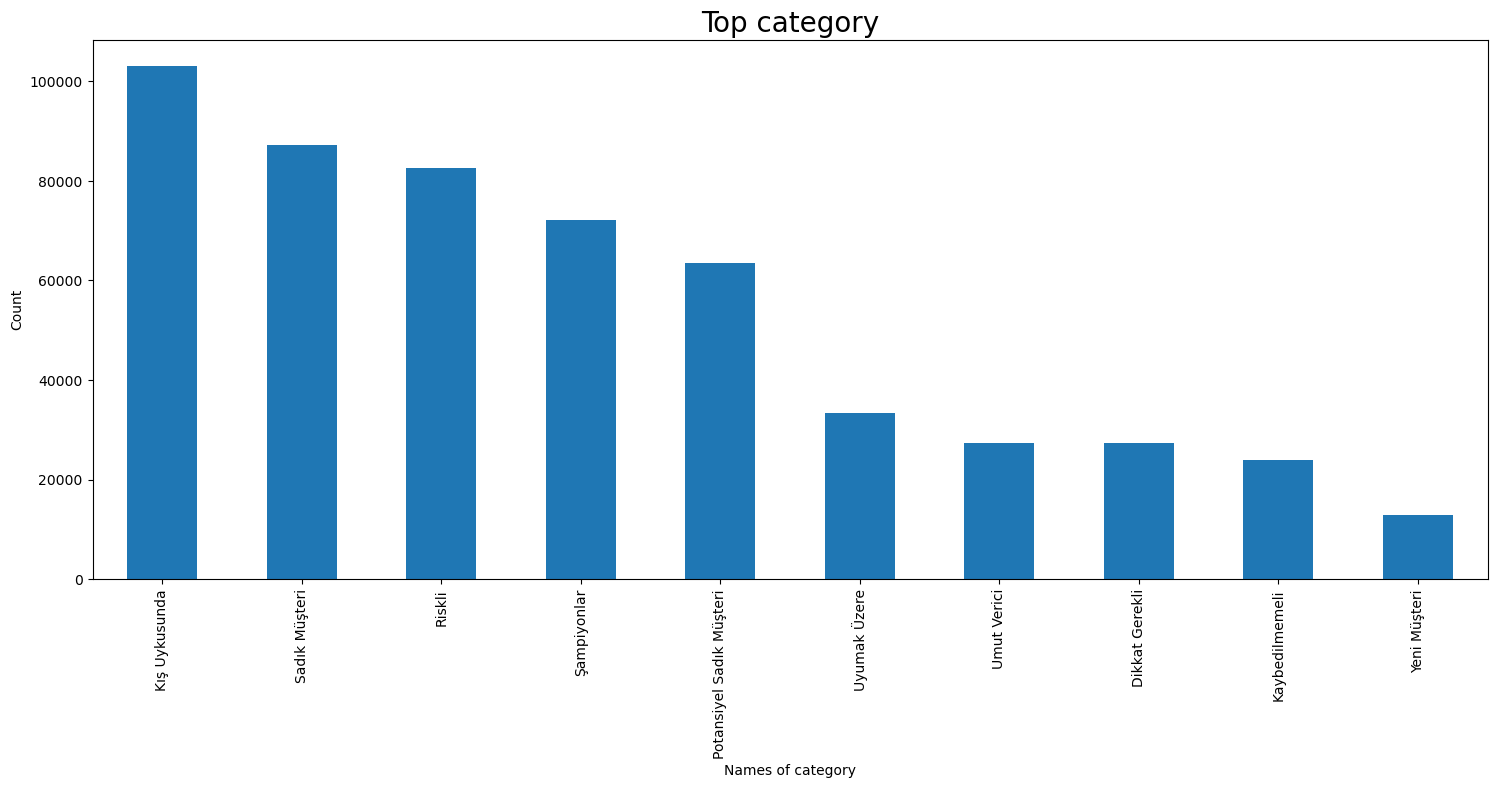

In [35]:
rfm['segment'].value_counts().head(20).plot.bar(figsize = (18,7))
plt.title('Top category',fontsize = 20)
plt.xlabel('Names of category')
plt.ylabel('Count')
plt.show()

---------

rfm ile normal df birleştirerek df içersinde segment oluşmasını sağlamak...

In [44]:
dfwithsegment = df.merge(rfm, how="left", on="user_id")

In [46]:
dfwithsegment.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
0,2019-10-01 00:02:14,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564,3,58,7901.88,5,5,5,55,champions
1,2019-10-01 00:04:37,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,7,15,6082.59,5,5,5,55,champions
2,2019-10-01 00:07:07,purchase,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f,36,4,163.74,2,5,2,25,cant_loose
3,2019-10-01 00:09:26,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553,15,2,639.29,4,4,4,44,loyal_customers
4,2019-10-01 00:09:54,purchase,4804056,2053013554658804075,electronics.audio.headphone,apple,161.98,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,7,15,6082.59,5,5,5,55,champions


In [50]:
dfwithsegment.drop('recency',axis=1, inplace=True)
dfwithsegment.drop('frequency',axis=1, inplace=True)
dfwithsegment.drop('monetary',axis=1, inplace=True)
dfwithsegment.drop('recency_score',axis=1, inplace=True)
dfwithsegment.drop('frequency_score',axis=1, inplace=True)
dfwithsegment.drop('RFM_SCORE',axis=1, inplace=True)
dfwithsegment.drop('monetary_score',axis=1, inplace=True)

KeyError: "['recency'] not found in axis"

In [51]:
dfwithsegment.drop('monetary_score',axis=1, inplace=True)

In [52]:
dfwithsegment.to_csv("dfwithsegment.csv")